In [65]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier     
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [66]:
# Load flagged dataset #
dataset_flagged = pd.read_csv("flagged.csv")
X_flagged_unscaled = dataset_flagged.drop(['cls'], axis=1)
Y_flagged = dataset_flagged['cls']

# Load original dataset #
dataset_original = arff.loadarff("15s.arff")
dataset_original = pd.DataFrame(dataset_original[0])
dataset_original["class1"] = dataset_original["class1"].str.decode('utf-8')
X_original_unscaled = dataset_original.drop(['class1'], axis=1)
Y_original = dataset_original['class1']

# Creating model dictionary #
models = {
    'Tree': DecisionTreeClassifier(random_state=1),
    'SVM': svm.SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
}

We will be using cross-validation. 

In [67]:
display(X_original_unscaled.max(axis=0).to_frame(name='Max Value'))

,Max Value
duration,601404954.0
total_fiat,37680787.0
total_biat,43002377.0
min_fiat,303595747.0
min_biat,600109667.0
max_fiat,152000000.0
max_biat,43000000.0
mean_fiat,215000000.0
mean_biat,98000000.0
flowPktsPerSecond,1000000.0


In [68]:
display(X_flagged_unscaled.max(axis=0).to_frame(name='Max Value'))

,Max Value
Unnamed: 0,18757.0
duration,601404954.0
pps,1000000.0
bps,617000000.0
max_flowiat,600109654.0
mean_flowiat,60700000.0
has_active,1.0
has_std_active,1.0
has_fiat,1.0
has_biat,1.0


Looking above, we notice that the data is horribly scaled. We will use the StandardScaler to normalize everything before training any of the models.

In [69]:
scaler = StandardScaler()
X_original_scaled = scaler.fit_transform(X_original_unscaled)
X_flagged_scaled = scaler.fit_transform(X_flagged_unscaled)

We will attempt to train with both unscaled and scaled data.

In [75]:
# Calculate accuracy for unscaled datasets #
scores_original_unscaled = {}
for name, model in models.items():
    score_original = cross_val_score(model, X_original_unscaled, Y_original, cv=10).mean()
    scores_original_unscaled[name] = score_original

In [76]:
scores_flagged_unscaled = {}
for name, model in models.items():
    score_flagged = cross_val_score(model, X_flagged_unscaled, Y_flagged, cv=10).mean()
    scores_flagged_unscaled[name] = score_flagged

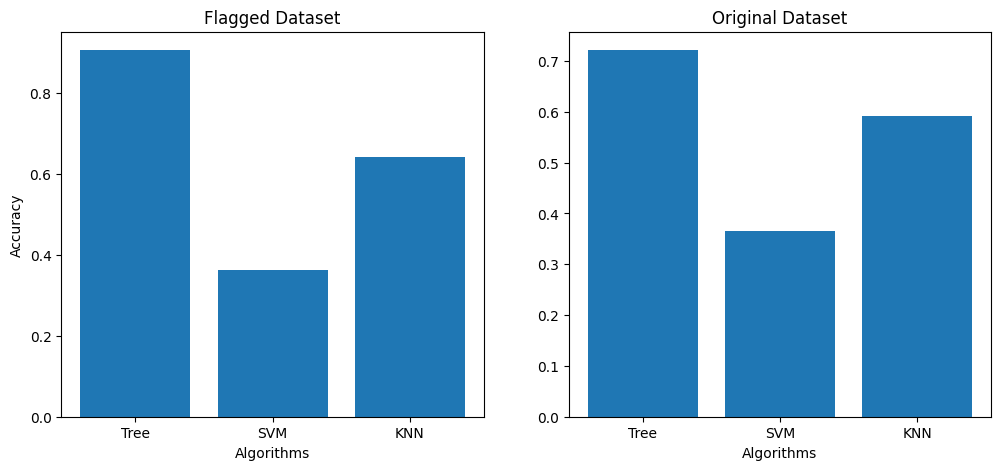

In [77]:
# Plotting the results of unscaled datasets #
fig, (ax1_unscaled, ax2_unscaled) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1_unscaled.bar(list(scores_flagged_unscaled.keys()), list(scores_flagged_unscaled.values()))
ax1_unscaled.set_title("Flagged Dataset")
ax1_unscaled.set_xlabel("Algorithms")
ax1_unscaled.set_ylabel("Accuracy")

ax2_unscaled.bar(list(scores_original_unscaled.keys()), list(scores_original_unscaled.values()))
ax2_unscaled.set_title("Original Dataset")
ax2_unscaled.set_xlabel("Algorithms")
plt.show()

In [72]:
# Calculate accuracy for scaled datasets #
scores_flagged_scaled = {}
scores_original_scaled = {}
for name, model in models.items():
    score_flagged = cross_val_score(model, X_flagged_scaled, Y_flagged, cv=10).mean()
    score_original = cross_val_score(model, X_original_scaled, Y_original, cv=10).mean()
    scores_original_scaled[name] = score_original
    scores_flagged_scaled[name] = score_flagged


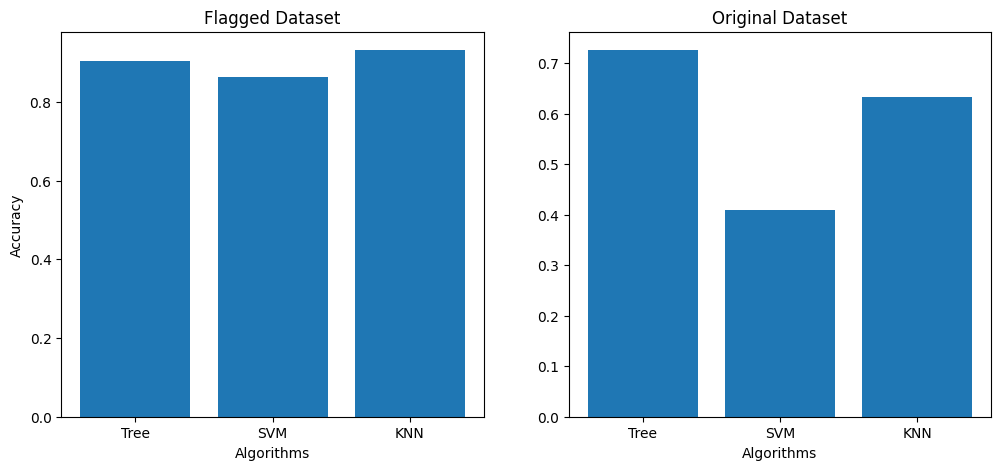

In [73]:
# Plotting the results of scaled dataset. #
fig, (ax1_scaled, ax2_scaled) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1_scaled.bar(list(scores_flagged_scaled.keys()), list(scores_flagged_scaled.values()))
ax1_scaled.set_title("Flagged Dataset")
ax1_scaled.set_xlabel("Algorithms")
ax1_scaled.set_ylabel("Accuracy")

ax2_scaled.bar(list(scores_original_scaled.keys()), list(scores_original_scaled.values()))
ax2_scaled.set_title("Original Dataset")
ax2_scaled.set_xlabel("Algorithms")
plt.show()

We can see major improvement for both SVM and KNN, for the flagged dataset, after having scaled the data.